# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
!pip show numpy

Name: numpy
Version: 1.24.4
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages
Requires: 
Required-by: bokeh, captum, contourpy, gym, hdijupyterutils, imageio, matplotlib, numba, onnx, opencv-python, pandas, patsy, pyarrow, sagemaker, sagemaker-pyspark, scikit-learn, scipy, seaborn, shap, smclarify, sparkmagic, statsmodels, torchtext, torchvision


In [2]:
# Update the PATH to include the user installation directory. 
import os
new_path = '/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages'
os.environ['PATH'] = f"{os.environ['PATH']}:{new_path}"
#/root/.local/bin"
# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [3]:
# Install requirements
!python -m pip install -r requirements.txt

  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/21/6d/abf701fa71ff22e3617ec9b46197f9ff5bba16dfefa7ee259b60216112eb/opencv_python_headless-4.8.0.76-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pytest from https://files.pythonhosted.org/packages/78/af/1a79db43409ea8569a8a91d0a87db4445c7de4cefcf6141e9a5c77dda2d6/pytest-7.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for pluggy<2.0,>=0.12 from https://files.pythonhosted.org/packages/05/b8/42ed91898d4784546c5f06c60506400548db3f7a4b3fb441cba4e5c17952/pluggy-1.3.0-py3-none-any.whl.metadata


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.2/324.2 kB 11.4 MB/s eta 0:00:00


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
data_transforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize([0.5], [0.5])
                                ])

# Create training set and define training dataloader
trainSet = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform= data_transforms)

trainset, validSet = torch.utils.data.random_split(trainSet, [50000,10000])
trainloaders = torch.utils.data.DataLoader(trainset,batch_size=32,shuffle=True)
validloaders = torch.utils.data.DataLoader(validSet,batch_size=32,shuffle=True)

# Create test set and define test dataloader
testSet = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform= data_transforms)
testloaders = torch.utils.data.DataLoader(testSet,batch_size=32,shuffle=True)

In [3]:
len(validSet),len(trainSet),len(trainset)

(10000, 60000, 50000)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I chose the transforms to convert the MNIST images into a format suitable for training the neural network. These transforms include converting the images to tensors and normalizing their pixel values. These steps are common for deep learning tasks as they help the model learn better by scaling input data and making it compatible with PyTorch.
I did not use any extra preprocessing steps because the dataset was already in a suitable format, so I thought no additional preprocessing was necessary.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


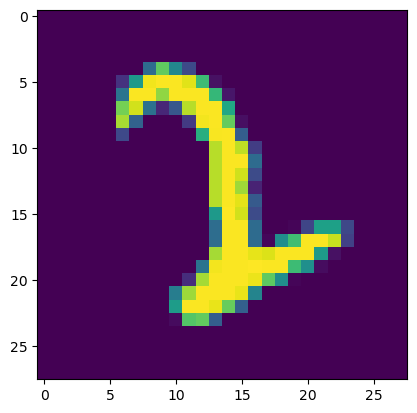

2


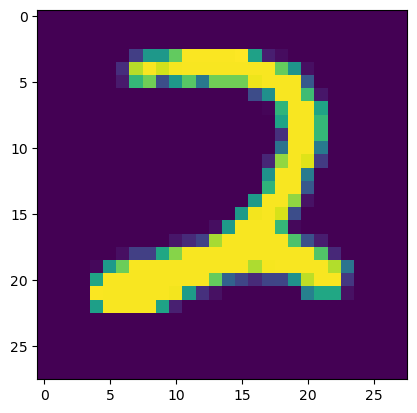

0


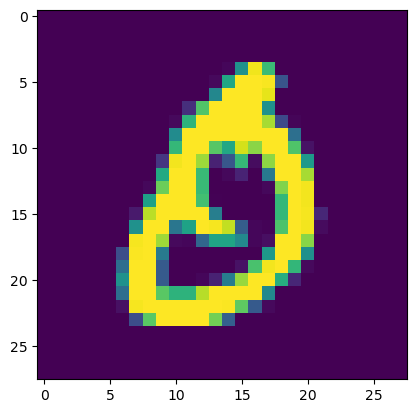

3


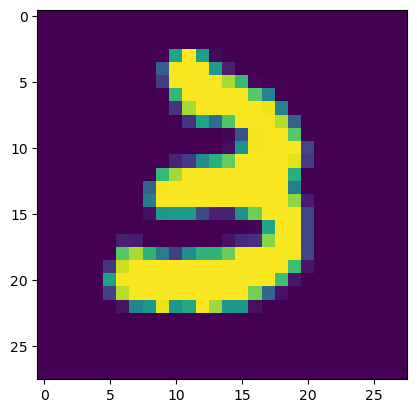

1


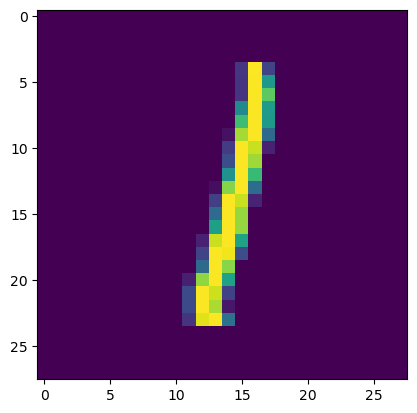

In [5]:
# Explore data
## YOUR CODE HERE ##
show5(trainloaders)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)  # Flatten MNIST images to 28*28 size
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes for MNIST

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [7]:
model = Net()

In [8]:
!pip install torchsummary

In [9]:
from torchsummary import summary
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
            Linear-3                   [-1, 64]           8,256
            Linear-4                   [-1, 10]             650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.42
Estimated Total Size (MB): 0.43
----------------------------------------------------------------


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
## YOUR CODE HERE ##
epochs = 3
print_every = 5
steps = 0
tloss = []
vloss = []
for e in range(epochs):
    running_loss = 0
    for inputs, labels in trainloaders:
        steps += 1
        
        optimizer.zero_grad()
        
        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if steps % print_every == 0:
            model.eval()
            valid_loss = 0
            accuracy = 0
            tloss.append(running_loss/len(trainloaders))
            with torch.no_grad():
                for inputs, labels in validloaders:
                    
                    log_ps = model.forward(inputs)
                    batch_loss = criterion(log_ps, labels)
                    valid_loss += batch_loss.item()
                    
                    ps = torch.exp(log_ps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            print(f"Epoch {e+1}/{epochs}.. "
                  f"Loss: {running_loss/print_every:.3f}.. "
                  f"Validation Loss: {valid_loss/len(validloaders):.3f}.. "
                  f"Accuracy: {accuracy/len(validloaders):.3f}")
            vloss.append(valid_loss/len(validloaders))
            running_loss = 0
            model.train()

Epoch 1/3.. Loss: 2.194.. Validation Loss: 2.275.. Accuracy: 0.189
Epoch 1/3.. Loss: 2.180.. Validation Loss: 2.036.. Accuracy: 0.379
Epoch 1/3.. Loss: 1.977.. Validation Loss: 1.923.. Accuracy: 0.316
Epoch 1/3.. Loss: 1.773.. Validation Loss: 1.682.. Accuracy: 0.482
Epoch 1/3.. Loss: 1.637.. Validation Loss: 1.509.. Accuracy: 0.549
Epoch 1/3.. Loss: 1.464.. Validation Loss: 1.405.. Accuracy: 0.635
Epoch 1/3.. Loss: 1.387.. Validation Loss: 1.235.. Accuracy: 0.661
Epoch 1/3.. Loss: 1.231.. Validation Loss: 1.136.. Accuracy: 0.672
Epoch 1/3.. Loss: 1.090.. Validation Loss: 1.016.. Accuracy: 0.710
Epoch 1/3.. Loss: 1.044.. Validation Loss: 0.910.. Accuracy: 0.745
Epoch 1/3.. Loss: 0.879.. Validation Loss: 0.852.. Accuracy: 0.741
Epoch 1/3.. Loss: 0.789.. Validation Loss: 0.898.. Accuracy: 0.688
Epoch 1/3.. Loss: 0.816.. Validation Loss: 0.736.. Accuracy: 0.787
Epoch 1/3.. Loss: 0.630.. Validation Loss: 0.644.. Accuracy: 0.833
Epoch 1/3.. Loss: 0.575.. Validation Loss: 0.654.. Accuracy: 0

Epoch 1/3.. Loss: 0.307.. Validation Loss: 0.310.. Accuracy: 0.905
Epoch 1/3.. Loss: 0.343.. Validation Loss: 0.334.. Accuracy: 0.898
Epoch 1/3.. Loss: 0.322.. Validation Loss: 0.315.. Accuracy: 0.905
Epoch 1/3.. Loss: 0.416.. Validation Loss: 0.335.. Accuracy: 0.892
Epoch 1/3.. Loss: 0.354.. Validation Loss: 0.292.. Accuracy: 0.908
Epoch 1/3.. Loss: 0.450.. Validation Loss: 0.289.. Accuracy: 0.911
Epoch 1/3.. Loss: 0.263.. Validation Loss: 0.316.. Accuracy: 0.905
Epoch 1/3.. Loss: 0.387.. Validation Loss: 0.328.. Accuracy: 0.899
Epoch 1/3.. Loss: 0.381.. Validation Loss: 0.320.. Accuracy: 0.898
Epoch 1/3.. Loss: 0.295.. Validation Loss: 0.297.. Accuracy: 0.906
Epoch 1/3.. Loss: 0.357.. Validation Loss: 0.298.. Accuracy: 0.909
Epoch 1/3.. Loss: 0.351.. Validation Loss: 0.322.. Accuracy: 0.902
Epoch 1/3.. Loss: 0.376.. Validation Loss: 0.289.. Accuracy: 0.916
Epoch 1/3.. Loss: 0.357.. Validation Loss: 0.277.. Accuracy: 0.920
Epoch 1/3.. Loss: 0.230.. Validation Loss: 0.289.. Accuracy: 0

Epoch 1/3.. Loss: 0.248.. Validation Loss: 0.255.. Accuracy: 0.920
Epoch 1/3.. Loss: 0.237.. Validation Loss: 0.233.. Accuracy: 0.929
Epoch 1/3.. Loss: 0.183.. Validation Loss: 0.281.. Accuracy: 0.915
Epoch 1/3.. Loss: 0.245.. Validation Loss: 0.233.. Accuracy: 0.929
Epoch 1/3.. Loss: 0.184.. Validation Loss: 0.221.. Accuracy: 0.932
Epoch 1/3.. Loss: 0.237.. Validation Loss: 0.230.. Accuracy: 0.930
Epoch 1/3.. Loss: 0.228.. Validation Loss: 0.231.. Accuracy: 0.932
Epoch 1/3.. Loss: 0.146.. Validation Loss: 0.222.. Accuracy: 0.935
Epoch 1/3.. Loss: 0.163.. Validation Loss: 0.255.. Accuracy: 0.925
Epoch 1/3.. Loss: 0.242.. Validation Loss: 0.220.. Accuracy: 0.932
Epoch 1/3.. Loss: 0.154.. Validation Loss: 0.247.. Accuracy: 0.920
Epoch 1/3.. Loss: 0.187.. Validation Loss: 0.224.. Accuracy: 0.931
Epoch 1/3.. Loss: 0.235.. Validation Loss: 0.217.. Accuracy: 0.935
Epoch 1/3.. Loss: 0.134.. Validation Loss: 0.207.. Accuracy: 0.938
Epoch 1/3.. Loss: 0.266.. Validation Loss: 0.206.. Accuracy: 0

Epoch 2/3.. Loss: 0.226.. Validation Loss: 0.196.. Accuracy: 0.939
Epoch 2/3.. Loss: 0.218.. Validation Loss: 0.227.. Accuracy: 0.931
Epoch 2/3.. Loss: 0.208.. Validation Loss: 0.219.. Accuracy: 0.930
Epoch 2/3.. Loss: 0.257.. Validation Loss: 0.197.. Accuracy: 0.936
Epoch 2/3.. Loss: 0.108.. Validation Loss: 0.190.. Accuracy: 0.941
Epoch 2/3.. Loss: 0.097.. Validation Loss: 0.190.. Accuracy: 0.943
Epoch 2/3.. Loss: 0.155.. Validation Loss: 0.177.. Accuracy: 0.946
Epoch 2/3.. Loss: 0.157.. Validation Loss: 0.212.. Accuracy: 0.935
Epoch 2/3.. Loss: 0.172.. Validation Loss: 0.181.. Accuracy: 0.943
Epoch 2/3.. Loss: 0.152.. Validation Loss: 0.182.. Accuracy: 0.942
Epoch 2/3.. Loss: 0.093.. Validation Loss: 0.181.. Accuracy: 0.944
Epoch 2/3.. Loss: 0.097.. Validation Loss: 0.175.. Accuracy: 0.947
Epoch 2/3.. Loss: 0.151.. Validation Loss: 0.201.. Accuracy: 0.936
Epoch 2/3.. Loss: 0.251.. Validation Loss: 0.182.. Accuracy: 0.944
Epoch 2/3.. Loss: 0.231.. Validation Loss: 0.227.. Accuracy: 0

Epoch 2/3.. Loss: 0.197.. Validation Loss: 0.188.. Accuracy: 0.942
Epoch 2/3.. Loss: 0.164.. Validation Loss: 0.195.. Accuracy: 0.941
Epoch 2/3.. Loss: 0.172.. Validation Loss: 0.181.. Accuracy: 0.942
Epoch 2/3.. Loss: 0.173.. Validation Loss: 0.190.. Accuracy: 0.940
Epoch 2/3.. Loss: 0.123.. Validation Loss: 0.194.. Accuracy: 0.941
Epoch 2/3.. Loss: 0.154.. Validation Loss: 0.183.. Accuracy: 0.944
Epoch 2/3.. Loss: 0.157.. Validation Loss: 0.157.. Accuracy: 0.953
Epoch 2/3.. Loss: 0.174.. Validation Loss: 0.185.. Accuracy: 0.945
Epoch 2/3.. Loss: 0.133.. Validation Loss: 0.199.. Accuracy: 0.938
Epoch 2/3.. Loss: 0.294.. Validation Loss: 0.198.. Accuracy: 0.938
Epoch 2/3.. Loss: 0.254.. Validation Loss: 0.210.. Accuracy: 0.933
Epoch 2/3.. Loss: 0.114.. Validation Loss: 0.198.. Accuracy: 0.938
Epoch 2/3.. Loss: 0.205.. Validation Loss: 0.191.. Accuracy: 0.942
Epoch 2/3.. Loss: 0.138.. Validation Loss: 0.170.. Accuracy: 0.948
Epoch 2/3.. Loss: 0.179.. Validation Loss: 0.154.. Accuracy: 0

Epoch 2/3.. Loss: 0.165.. Validation Loss: 0.164.. Accuracy: 0.950
Epoch 2/3.. Loss: 0.163.. Validation Loss: 0.192.. Accuracy: 0.941
Epoch 2/3.. Loss: 0.163.. Validation Loss: 0.139.. Accuracy: 0.957
Epoch 2/3.. Loss: 0.200.. Validation Loss: 0.163.. Accuracy: 0.951
Epoch 2/3.. Loss: 0.156.. Validation Loss: 0.164.. Accuracy: 0.949
Epoch 2/3.. Loss: 0.113.. Validation Loss: 0.138.. Accuracy: 0.957
Epoch 2/3.. Loss: 0.213.. Validation Loss: 0.138.. Accuracy: 0.958
Epoch 2/3.. Loss: 0.118.. Validation Loss: 0.142.. Accuracy: 0.957
Epoch 2/3.. Loss: 0.171.. Validation Loss: 0.153.. Accuracy: 0.954
Epoch 2/3.. Loss: 0.214.. Validation Loss: 0.143.. Accuracy: 0.957
Epoch 3/3.. Loss: 0.085.. Validation Loss: 0.167.. Accuracy: 0.949
Epoch 3/3.. Loss: 0.138.. Validation Loss: 0.174.. Accuracy: 0.946
Epoch 3/3.. Loss: 0.191.. Validation Loss: 0.147.. Accuracy: 0.955
Epoch 3/3.. Loss: 0.141.. Validation Loss: 0.151.. Accuracy: 0.954
Epoch 3/3.. Loss: 0.061.. Validation Loss: 0.162.. Accuracy: 0

Epoch 3/3.. Loss: 0.131.. Validation Loss: 0.134.. Accuracy: 0.959
Epoch 3/3.. Loss: 0.077.. Validation Loss: 0.132.. Accuracy: 0.961
Epoch 3/3.. Loss: 0.179.. Validation Loss: 0.134.. Accuracy: 0.959
Epoch 3/3.. Loss: 0.163.. Validation Loss: 0.139.. Accuracy: 0.957
Epoch 3/3.. Loss: 0.137.. Validation Loss: 0.170.. Accuracy: 0.948
Epoch 3/3.. Loss: 0.140.. Validation Loss: 0.146.. Accuracy: 0.953
Epoch 3/3.. Loss: 0.056.. Validation Loss: 0.149.. Accuracy: 0.954
Epoch 3/3.. Loss: 0.174.. Validation Loss: 0.129.. Accuracy: 0.962
Epoch 3/3.. Loss: 0.073.. Validation Loss: 0.126.. Accuracy: 0.963
Epoch 3/3.. Loss: 0.184.. Validation Loss: 0.134.. Accuracy: 0.959
Epoch 3/3.. Loss: 0.113.. Validation Loss: 0.147.. Accuracy: 0.954
Epoch 3/3.. Loss: 0.252.. Validation Loss: 0.133.. Accuracy: 0.960
Epoch 3/3.. Loss: 0.177.. Validation Loss: 0.156.. Accuracy: 0.956
Epoch 3/3.. Loss: 0.101.. Validation Loss: 0.170.. Accuracy: 0.951
Epoch 3/3.. Loss: 0.146.. Validation Loss: 0.138.. Accuracy: 0

Epoch 3/3.. Loss: 0.133.. Validation Loss: 0.140.. Accuracy: 0.956
Epoch 3/3.. Loss: 0.133.. Validation Loss: 0.142.. Accuracy: 0.956
Epoch 3/3.. Loss: 0.147.. Validation Loss: 0.131.. Accuracy: 0.959
Epoch 3/3.. Loss: 0.081.. Validation Loss: 0.133.. Accuracy: 0.959
Epoch 3/3.. Loss: 0.135.. Validation Loss: 0.136.. Accuracy: 0.957
Epoch 3/3.. Loss: 0.139.. Validation Loss: 0.146.. Accuracy: 0.955
Epoch 3/3.. Loss: 0.093.. Validation Loss: 0.191.. Accuracy: 0.943
Epoch 3/3.. Loss: 0.190.. Validation Loss: 0.164.. Accuracy: 0.952
Epoch 3/3.. Loss: 0.061.. Validation Loss: 0.151.. Accuracy: 0.955
Epoch 3/3.. Loss: 0.102.. Validation Loss: 0.145.. Accuracy: 0.956
Epoch 3/3.. Loss: 0.091.. Validation Loss: 0.126.. Accuracy: 0.962
Epoch 3/3.. Loss: 0.080.. Validation Loss: 0.134.. Accuracy: 0.959
Epoch 3/3.. Loss: 0.179.. Validation Loss: 0.138.. Accuracy: 0.957
Epoch 3/3.. Loss: 0.183.. Validation Loss: 0.132.. Accuracy: 0.959
Epoch 3/3.. Loss: 0.175.. Validation Loss: 0.122.. Accuracy: 0

In [12]:
len(vloss),len(tloss)

(937, 937)

Plot the training loss (and validation loss/accuracy, if recorded).

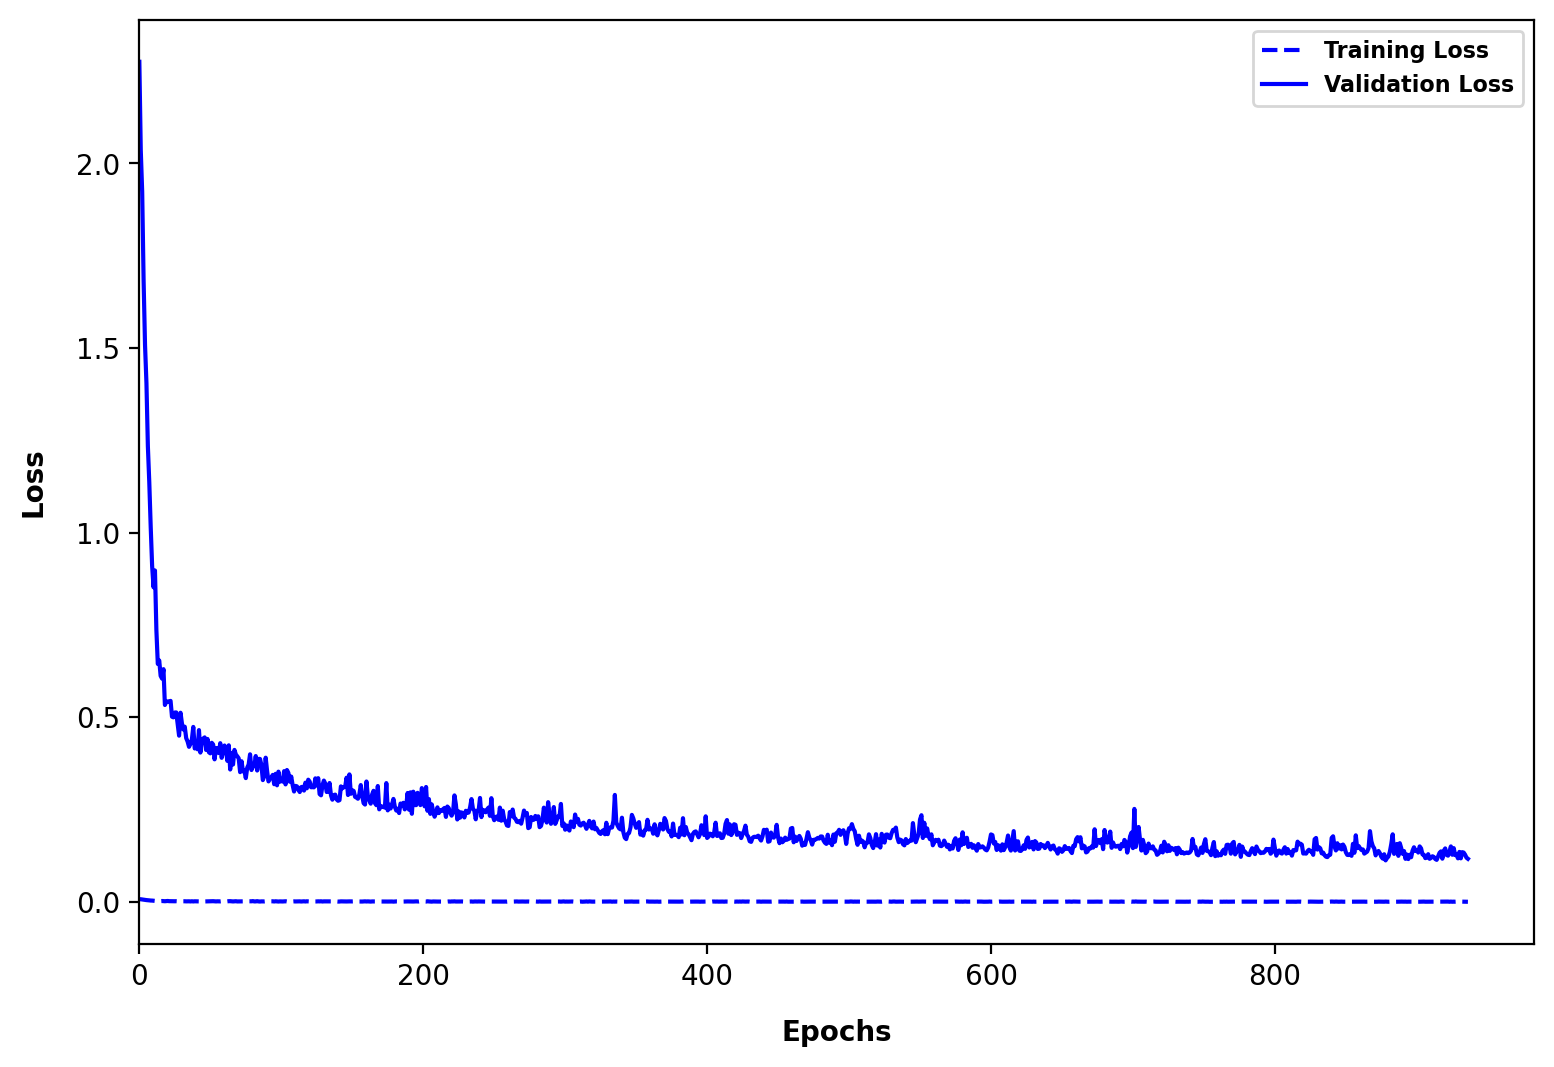

In [15]:
## YOUR CODE HERE ##
fig = plt.figure(figsize=(9,6), dpi=200)
x = [i for i in range(937)]

plt.plot(x,tloss, 'b', linestyle='dashed', label = "Training Loss")
plt.plot(x,vloss, 'b', label = "Validation Loss")

plt.xlabel("Epochs", fontweight="bold", labelpad=10)
plt.ylabel("Loss", fontweight="bold", labelpad=10)
plt.xlim(xmin=0)

plt.legend(prop = {'size':8, 'weight': 'bold'}, loc='best')
plt.savefig(r'losses.png', bbox_inches="tight")
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [16]:
## YOUR CODE HERE ##
test_loss = 0
accuracy = 0

with torch.no_grad():
    for inputs, labels in testloaders:
        
        log_ps = model.forward(inputs)
        batch_loss = criterion(log_ps, labels)
                    
        test_loss += batch_loss.item()
                    
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        
print(f"Test accuracy: {accuracy/len(testloaders):.3f}")

Test accuracy: 0.966


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [18]:
# Hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
num_epochs = [10, 20, 30]

In [20]:
# Hyperparameter tuning
for lr in learning_rates:
    for epochs in num_epochs:
        print(f'Tuning with Learning Rate={lr}, Num Epochs={epochs}')
        hmodel = Net()
        
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(hmodel.parameters(), lr=lr)

        for epoch in range(epochs):
            hmodel.train()
            for batch_idx, (data, target) in enumerate(trainloaders):
                optimizer.zero_grad()
                output = hmodel(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()

        hmodel.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in testloaders:
                output = hmodel(data)
                test_loss += criterion(output, target).item()
                pred = output.argmax(dim=1)
                correct += pred.eq(target).sum().item()

        test_loss /= len(testloaders.dataset)
        accuracy = 100.0 * correct / len(testloaders.dataset)
        print(f'Epochs: {epochs}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')
        print('-' * 50)

Tuning with Learning Rate=0.001, Num Epochs=10
Epochs: 10, Test Loss: 0.0035, Accuracy: 97.05%
--------------------------------------------------
Tuning with Learning Rate=0.001, Num Epochs=20
Epochs: 20, Test Loss: 0.0040, Accuracy: 97.00%
--------------------------------------------------
Tuning with Learning Rate=0.001, Num Epochs=30
Epochs: 30, Test Loss: 0.0038, Accuracy: 97.61%
--------------------------------------------------
Tuning with Learning Rate=0.01, Num Epochs=10
Epochs: 10, Test Loss: 0.0087, Accuracy: 93.49%
--------------------------------------------------
Tuning with Learning Rate=0.01, Num Epochs=20
Epochs: 20, Test Loss: 0.0091, Accuracy: 93.37%
--------------------------------------------------
Tuning with Learning Rate=0.01, Num Epochs=30
Epochs: 30, Test Loss: 0.0078, Accuracy: 94.66%
--------------------------------------------------
Tuning with Learning Rate=0.1, Num Epochs=10
Epochs: 10, Test Loss: 0.0725, Accuracy: 11.35%
----------------------------------

## Saving your model
Using `torch.save`, save your model for future loading.

In [17]:
torch.save({'input_size': 28 * 28,
            'output_size': 10,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'epochs': epochs}, 'model.pth')